In [2]:
from matplotlib import pyplot as plt
import numpy as np
import collections

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [3]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [4]:
from torchvision import datasets, transforms

data_path = "../lesson3/dataset"

cifar10_train = datasets.CIFAR10(
    data_path,
    download=True,
    train=True,
    transform=transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize([0.4915, 0.4823, 0.4468], [0.2470, 0.2435, 0.2616]),
        ]
    ),
)

Files already downloaded and verified


In [5]:
data_path = "../lesson3/dataset"

cifar10_test = datasets.CIFAR10(
    data_path,
    download=True,
    train=False,
    transform=transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize([0.4915, 0.4823, 0.4468], [0.2470, 0.2435, 0.2616]),
        ]
    ),
)

Files already downloaded and verified


In [6]:
len(cifar10_train), len(cifar10_test)

(50000, 10000)

In [7]:
cifar10_test[0]

(tensor([[[ 0.5187,  0.5345,  ...,  0.0106, -0.1482],
          [ 0.4234,  0.4075,  ..., -0.0053, -0.1005],
          ...,
          [-1.0214, -1.2119,  ..., -1.5295, -1.6723],
          [-1.1325, -1.1008,  ..., -1.4501, -1.6565]],
 
         [[-0.1769, -0.1930,  ..., -0.5151, -0.6118],
          [-0.1769, -0.2091,  ..., -0.5151, -0.5635],
          ...,
          [-0.1125, -0.3380,  ..., -0.6601, -0.9500],
          [-0.2575, -0.2897,  ..., -0.6279, -0.9017]],
 
         [[-0.9734, -1.0034,  ..., -1.1683, -1.2133],
          [-0.9434, -1.1083,  ..., -1.2282, -1.1983],
          ...,
          [ 0.8105,  0.5107,  ...,  0.1809, -0.1039],
          [ 0.6906,  0.5257,  ...,  0.2259, -0.0590]]]),
 3)

In [13]:
img, label = cifar10_test[0]
img.shape, label

(torch.Size([3, 32, 32]), 3)

In [18]:
label_map = {0: 0, 2: 1}
class_names = ["air_plane", "birds"]

cifar2_train = [
    (img, label_map[label]) for img, label in cifar10_train if label in [0, 2]
]
cifar2_test = [
    (img, label_map[label]) for img, label in cifar10_test if label in [0, 2]
]

In [19]:
connected_model = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2),
)

numel_list = [
    p.numel() for p in connected_model.parameters() if p.requires_grad == True
]

sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [20]:
linear = nn.Linear(3072, 1024)
linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))

In [21]:
conv = nn.Conv2d(3, 16, kernel_size=3)
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [22]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [34]:
img, _ = cifar2_train[0]
img.shape

torch.Size([3, 32, 32])

In [36]:
img_view = img.view(-1)
img_view.shape

torch.Size([3072])

In [38]:
img = img.unsqueeze(0)
img.shape

torch.Size([1, 3, 32, 32])

In [42]:
img, _ = cifar2_train[0]
output = conv(img.unsqueeze(0))
output.shape

torch.Size([1, 16, 30, 30])

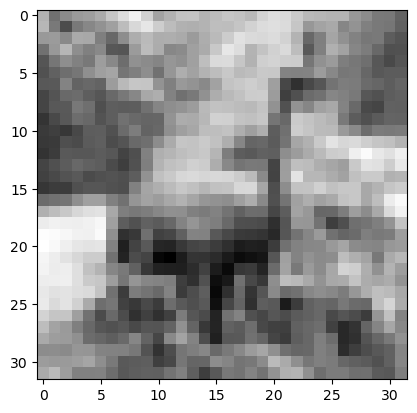

In [43]:
plt.imshow(img.mean(0), cmap="gray")

In [58]:
output[0, 0].shape

torch.Size([30, 30])

In [51]:
img.mean(0)

tensor([[ 0.5007, -0.2808,  ..., -0.1873, -0.4339],
        [ 0.5542, -0.1752,  ..., -0.2151, -0.4552],
        ...,
        [ 0.2374,  0.2070,  ..., -0.4448, -0.0253],
        [ 0.4067,  0.5953,  ..., -0.5673, -0.1147]])

Text(0.5, 1.0, 'input')

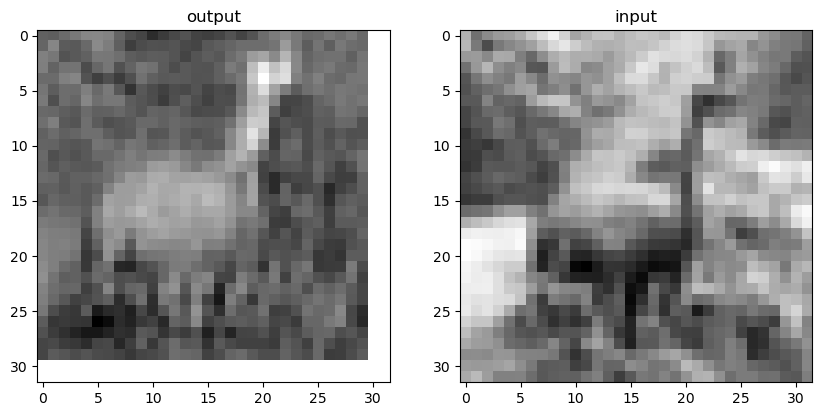

In [45]:
plt.figure(figsize=(10, 4.8))
ax1 = plt.subplot(1, 2, 1)
plt.title("output")
plt.imshow(output[0, 0].detach(), cmap="gray")
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
plt.imshow(img.mean(0), cmap="gray")
plt.title("input")

In [59]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

In [62]:
with torch.no_grad():
    conv.bias.zero_()
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

In [67]:
# Example tensor with shape (1, 2, 3, 3)
output = torch.tensor(
    [
        [
            [[0.5, 0.6, 0.4], [0.7, 0.2, 0.1], [0.9, 0.3, 0.8]],
            [[0.1, 0.3, 0.6], [0.8, 0.7, 0.2], [0.4, 0.9, 0.5]],
        ]
    ]
)  # Shape: (1, 2, 3, 3)

output[0] == [
    [[0.5, 0.6, 0.4], [0.7, 0.2, 0.1], [0.9, 0.3, 0.8]],
    [[0.1, 0.3, 0.6], [0.8, 0.7, 0.2], [0.4, 0.9, 0.5]],
]  # Shape: (2, 3, 3)

output[0, 0] == [[0.5, 0.6, 0.4], [0.7, 0.2, 0.1], [0.9, 0.3, 0.8]]  # Shape: (3, 3)

False

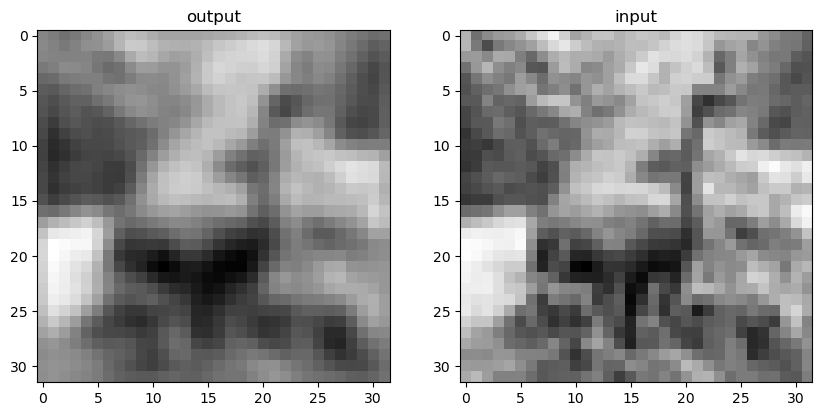

In [68]:
output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))
ax1 = plt.subplot(1, 2, 1)
plt.title("output")
plt.imshow(output[0, 0].detach(), cmap="gray")
plt.subplot(1, 2, 2)
plt.title("input")
plt.imshow(img.mean(0), cmap="gray")

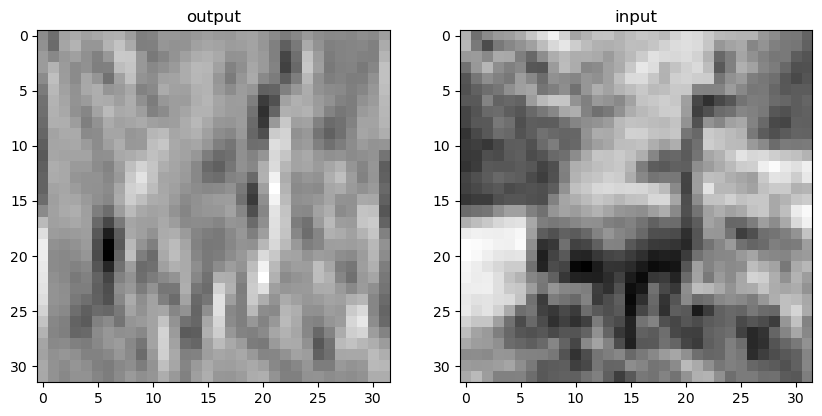

In [69]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor(
        [[-1.0, 0.0, 1.0], [-1.0, 0.0, 1.0], [-1.0, 0.0, 1.0]]
    )
    conv.bias.zero_()

output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)  # bookskip
plt.title("output")  # bookskip
plt.imshow(output[0, 0].detach(), cmap="gray")
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap="gray")  # bookskip
plt.title("input")  # bookskip
plt.savefig("Ch8_F5_PyTorch.png")  # bookskip
plt.show()

In [70]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [73]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 8, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(512, 32),
    nn.Tanh(),
    nn.Linear(32, 2),
)

numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [75]:
out = model(img.unsqueeze(0))
torch.max(out, dim=1)

torch.return_types.max(
values=tensor([-0.0207], grad_fn=<MaxBackward0>),
indices=tensor([1]))

In [85]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)

        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)

        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool1(self.act1(self.conv1(x)))
        out = out.view(-1, 512)
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out


model = Net()
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [88]:
out = out.view(-1)
out[1]

tensor(-0.0207, grad_fn=<SelectBackward0>)

In [151]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [152]:
model = Net()
model(img.unsqueeze(0))

tensor([[ 0.0359, -0.1468]], grad_fn=<AddmmBackward0>)

In [153]:
import datetime
from torch.utils.data import DataLoader


def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            outputs = model(imgs)

            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print(
                "{} Epoch {}, Training loss {}".format(
                    datetime.datetime.now(), epoch, loss_train / len(train_loader)
                )
            )  # <10>


train_loader = DataLoader(cifar2_train, batch_size=64, shuffle=True)
model = Net()
loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-2

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 100
training_loop(n_epochs, optimizer, model, loss_fn, train_loader)

2024-10-13 21:05:01.946541 Epoch 1, Training loss 0.5773623439536733
2024-10-13 21:05:05.941760 Epoch 10, Training loss 0.33177653666894147
2024-10-13 21:05:10.326287 Epoch 20, Training loss 0.29140673549311935
2024-10-13 21:05:14.707782 Epoch 30, Training loss 0.2617330554943935
2024-10-13 21:05:19.079025 Epoch 40, Training loss 0.24273340617585334
2024-10-13 21:05:23.444584 Epoch 50, Training loss 0.2243401551037837
2024-10-13 21:05:27.840168 Epoch 60, Training loss 0.20708811510900024
2024-10-13 21:05:32.265877 Epoch 70, Training loss 0.19108502381736306
2024-10-13 21:05:36.711736 Epoch 80, Training loss 0.17547334348604937
2024-10-13 21:05:41.152455 Epoch 90, Training loss 0.16210515232412678
2024-10-13 21:05:45.666290 Epoch 100, Training loss 0.14859485813671616


In [154]:
train_loader = DataLoader(cifar2_train, batch_size=64, shuffle=True)
test_loader = DataLoader(cifar2_test, batch_size=64, shuffle=True)

all_acc_dict = collections.OrderedDict()


def validate(model, train_loader, test_loader):
    accdict = {}
    for name, loader in [("train", train_loader), ("test", test_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():
            for imgs, labels in loader:
                # imgs = imgs.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                correct += int((predicted == labels).sum())
                total += labels.shape[0]
        print("Accuracy {}: {:.2f}".format(name, correct / total))
        accdict[name] = correct / total
    return accdict


all_acc_dict["baseline"] = validate(model, train_loader, test_loader)

Accuracy train: 0.93
Accuracy test: 0.88


In [105]:
data_path = "./"
torch.save(model.state_dict(), data_path + "birds_vs_airplanes.pt")

Training on device cuda.


In [106]:
loaded_model = Net()
loaded_model.load_state_dict(torch.load(data_path + "birds_vs_airplanes.pt"))

/tmp/ipykernel_15998/938870844.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(data_path + "birds_vs_airplanes.pt"))


<All keys matched successfully>

In [109]:
import datetime
from torch.utils.data import DataLoader

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Training on device {device}.")


def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)

            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print(
                "{} Epoch {}, Training loss {}".format(
                    datetime.datetime.now(), epoch, loss_train / len(train_loader)
                )
            )  # <10>


train_loader = DataLoader(cifar2_train, batch_size=64, shuffle=True)
model = Net().to(device=device)
loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-2

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 100
training_loop(n_epochs, optimizer, model, loss_fn, train_loader)

Training on device cuda.
2024-10-13 19:35:26.874998 Epoch 1, Training loss 0.5942039047456851
2024-10-13 19:35:28.470320 Epoch 10, Training loss 0.3351780284362234
2024-10-13 19:35:30.249591 Epoch 20, Training loss 0.3004957265724802
2024-10-13 19:35:31.935385 Epoch 30, Training loss 0.272345377476352
2024-10-13 19:35:33.657935 Epoch 40, Training loss 0.2487068147795975
2024-10-13 19:35:35.326219 Epoch 50, Training loss 0.232628430388156
2024-10-13 19:35:37.001525 Epoch 60, Training loss 0.21448949596304803
2024-10-13 19:35:38.748254 Epoch 70, Training loss 0.19754560044996297
2024-10-13 19:35:40.443825 Epoch 80, Training loss 0.18179281312189285
2024-10-13 19:35:42.097242 Epoch 90, Training loss 0.16618693024394618
2024-10-13 19:35:43.757547 Epoch 100, Training loss 0.15295525685332384


In [110]:
train_loader = DataLoader(cifar2_train, batch_size=64, shuffle=True)
test_loader = DataLoader(cifar2_test, batch_size=64, shuffle=True)


all_acc_dict = collections.OrderedDict()


def validate(model, train_loader, test_loader):
    accdict = {}
    for name, loader in [("train", train_loader), ("test", test_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                correct += int((predicted == labels).sum())
                total += labels.shape[0]
        print("Accuracy {}: {:.2f}".format(name, correct / total))
        accdict[name] = correct / total
    return accdict


all_acc_dict["baseline"] = validate(model, train_loader, test_loader)

Accuracy train: 0.94
Accuracy test: 0.89


In [112]:
loaded_model = Net().to(device=device)
loaded_model.load_state_dict(
    torch.load(data_path + "birds_vs_airplanes.pt", map_location=device)
)
loaded_model

/tmp/ipykernel_15998/4202793583.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(data_path + "birds_vs_airplanes.pt", map_location=device)


Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=512, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)

In [155]:
import datetime
from torch.utils.data import DataLoader

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Training on device {device}.")

import torch.nn.functional as F


class NetWidth(nn.Module):
    def __init__(self, n_chansl=32):
        super().__init__()
        self.n_chansl = n_chansl
        self.conv1 = nn.Conv2d(3, n_chansl, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chansl, n_chansl // 2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * n_chansl // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * self.n_chansl // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out


def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)

            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print(
                "{} Epoch {}, Training loss {}".format(
                    datetime.datetime.now(), epoch, loss_train / len(train_loader)
                )
            )  # <10>


train_loader = DataLoader(cifar2_train, batch_size=64, shuffle=True)
model = NetWidth(n_chansl=32).to(device=device)
loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-2

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 100
training_loop(
    n_epochs=n_epochs,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
)
test_loader = DataLoader(cifar2_test, batch_size=64, shuffle=True)


def validate(model, train_loader, test_loader):
    accdict = {}
    for name, loader in [("train", train_loader), ("test", test_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                correct += int((predicted == labels).sum())
                total += labels.shape[0]
        print("Accuracy {}: {:.2f}".format(name, correct / total))
        accdict[name] = correct / total
    return accdict


all_acc_dict["NetWidth"] = validate(model, train_loader, test_loader)

Training on device cuda.
2024-10-13 21:06:37.213309 Epoch 1, Training loss 0.5451705983489942
2024-10-13 21:06:39.649387 Epoch 10, Training loss 0.3141589125820026
2024-10-13 21:06:42.348828 Epoch 20, Training loss 0.2696631289781279
2024-10-13 21:06:45.040501 Epoch 30, Training loss 0.23837353227434643
2024-10-13 21:06:47.744804 Epoch 40, Training loss 0.2133814553451386
2024-10-13 21:06:50.455319 Epoch 50, Training loss 0.18779150724031363
2024-10-13 21:06:53.166742 Epoch 60, Training loss 0.1684613225471442
2024-10-13 21:06:55.873269 Epoch 70, Training loss 0.14620310919964388
2024-10-13 21:06:58.574012 Epoch 80, Training loss 0.12608319978900018
2024-10-13 21:07:01.283389 Epoch 90, Training loss 0.10735470132463297
2024-10-13 21:07:03.986857 Epoch 100, Training loss 0.09051941714848682
Accuracy train: 0.97
Accuracy test: 0.90


In [156]:
train_loader = DataLoader(cifar2_train, batch_size=64, shuffle=True)
test_loader = DataLoader(cifar2_test, batch_size=64, shuffle=True)


def validate(model, train_loader, test_loader):
    accdict = {}
    for name, loader in [("train", train_loader), ("test", test_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                correct += int((predicted == labels).sum())
                total += labels.shape[0]
        print("Accuracy {}: {:.2f}".format(name, correct / total))
        accdict[name] = correct / total
    return accdict


all_acc_dict["width"] = validate(model, train_loader, test_loader)

Accuracy train: 0.97
Accuracy test: 0.90


The training_loop_l2reg function you provided incorporates L2 regularization (also known as weight decay) into the training process. This method helps to prevent overfitting by penalizing large weights, encouraging the model to keep its weights smaller.


In [157]:
import datetime
from torch.utils.data import DataLoader
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out


device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Training on device {device}.")


def training_loop_l2reg(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)

            loss = loss_fn(outputs, labels)

            l2_lambda = 0.001
            l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
            loss = loss + l2_lambda * l2_norm
            optimizer.zero_grad()

            loss.backward()

            optimizer.step()
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print(
                "{} Epoch {}, Training loss {}".format(
                    datetime.datetime.now(), epoch, loss_train / len(train_loader)
                )
            )  # <10>


train_loader = DataLoader(cifar2_train, batch_size=64, shuffle=True)
model = Net().to(device=device)
loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-2

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 100
training_loop(n_epochs, optimizer, model, loss_fn, train_loader)


test_loader = DataLoader(cifar2_test, batch_size=64, shuffle=True)


def validate(model, train_loader, test_loader):
    accdict = {}
    for name, loader in [("train", train_loader), ("test", test_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                correct += int((predicted == labels).sum())
                total += labels.shape[0]
        print("Accuracy {}: {:.2f}".format(name, correct / total))
        accdict[name] = correct / total
    return accdict


all_acc_dict["l2 reg"] = validate(model, train_loader, test_loader)

Training on device cuda.
2024-10-13 21:08:08.707825 Epoch 1, Training loss 0.5613429635573345
2024-10-13 21:08:10.308464 Epoch 10, Training loss 0.33639753140082024
2024-10-13 21:08:11.995533 Epoch 20, Training loss 0.29060646711261406
2024-10-13 21:08:13.649230 Epoch 30, Training loss 0.2606877406501466
2024-10-13 21:08:15.296928 Epoch 40, Training loss 0.24239417056369175
2024-10-13 21:08:16.952555 Epoch 50, Training loss 0.2255798888624094
2024-10-13 21:08:18.613476 Epoch 60, Training loss 0.2071150914309131
2024-10-13 21:08:20.334329 Epoch 70, Training loss 0.19195311265006945
2024-10-13 21:08:22.053569 Epoch 80, Training loss 0.1781766317832242
2024-10-13 21:08:23.820064 Epoch 90, Training loss 0.16471946434040738
2024-10-13 21:08:25.580982 Epoch 100, Training loss 0.15421874396455515
Accuracy train: 0.93
Accuracy test: 0.89


In [158]:
import datetime
from torch.utils.data import DataLoader

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Training on device {device}.")

import torch.nn.functional as F


class NetDroupout(nn.Module):
    def __init__(self, n_chansl=32):
        super().__init__()
        self.n_chansl = n_chansl
        self.conv1 = nn.Conv2d(3, n_chansl, kernel_size=3, padding=1)
        self.conv1_dropout = nn.Dropout(p=0.4)
        self.conv2 = nn.Conv2d(n_chansl, n_chansl // 2, kernel_size=3, padding=1)
        self.conv2_dropout = nn.Dropout(p=0.4)
        self.fc1 = nn.Linear(8 * 8 * n_chansl // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = self.conv1_dropout(out)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = self.conv2_dropout(out)
        out = out.view(-1, 8 * 8 * self.n_chansl // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out


def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)

            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print(
                "{} Epoch {}, Training loss {}".format(
                    datetime.datetime.now(), epoch, loss_train / len(train_loader)
                )
            )  # <10>


train_loader = DataLoader(cifar2_train, batch_size=64, shuffle=True)
model = NetDroupout(n_chansl=32).to(device=device)
loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-2

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 100
training_loop(
    n_epochs=n_epochs,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
)
test_loader = DataLoader(cifar2_test, batch_size=64, shuffle=True)


def validate(model, train_loader, test_loader):
    accdict = {}
    for name, loader in [("train", train_loader), ("test", test_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                correct += int((predicted == labels).sum())
                total += labels.shape[0]
        print("Accuracy {}: {:.2f}".format(name, correct / total))
        accdict[name] = correct / total
    return accdict


all_acc_dict["dropout"] = validate(model, train_loader, test_loader)

Training on device cuda.
2024-10-13 21:09:04.398629 Epoch 1, Training loss 0.5797387063503265
2024-10-13 21:09:06.916642 Epoch 10, Training loss 0.3439884484763358
2024-10-13 21:09:09.722175 Epoch 20, Training loss 0.3071264182306399
2024-10-13 21:09:12.520747 Epoch 30, Training loss 0.291175704568055
2024-10-13 21:09:15.322149 Epoch 40, Training loss 0.27351575985455967
2024-10-13 21:09:18.124397 Epoch 50, Training loss 0.26396500267040957
2024-10-13 21:09:20.932758 Epoch 60, Training loss 0.25140389121451956
2024-10-13 21:09:23.742779 Epoch 70, Training loss 0.24214954237649394
2024-10-13 21:09:26.560756 Epoch 80, Training loss 0.2360470366610843
2024-10-13 21:09:29.374746 Epoch 90, Training loss 0.22185386209541066
2024-10-13 21:09:32.178422 Epoch 100, Training loss 0.2125109483481972
Accuracy train: 0.92
Accuracy test: 0.89


In [159]:
import datetime
from torch.utils.data import DataLoader

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Training on device {device}.")

import torch.nn.functional as F


class NetBatchNorm(nn.Module):
    def __init__(self, n_chansl=32):
        super().__init__()
        self.n_chansl = n_chansl
        self.conv1 = nn.Conv2d(3, n_chansl, kernel_size=3, padding=1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=n_chansl)
        self.conv2 = nn.Conv2d(n_chansl, n_chansl // 2, kernel_size=3, padding=1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features=n_chansl // 2)
        self.fc1 = nn.Linear(8 * 8 * n_chansl // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = self.conv2_batchnorm(self.conv2(out))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = out.view(-1, 8 * 8 * self.n_chansl // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out


def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)

            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print(
                "{} Epoch {}, Training loss {}".format(
                    datetime.datetime.now(), epoch, loss_train / len(train_loader)
                )
            )  # <10>


train_loader = DataLoader(cifar2_train, batch_size=64, shuffle=True)
model = NetBatchNorm(n_chansl=32).to(device=device)
loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-2

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 100
training_loop(
    n_epochs=n_epochs,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
)
test_loader = DataLoader(cifar2_test, batch_size=64, shuffle=True)


def validate(model, train_loader, test_loader):
    accdict = {}
    for name, loader in [("train", train_loader), ("test", test_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                correct += int((predicted == labels).sum())
                total += labels.shape[0]
        print("Accuracy {}: {:.2f}".format(name, correct / total))
        accdict[name] = correct / total
    return accdict


all_acc_dict["batch_norm"] = validate(model, train_loader, test_loader)

Training on device cuda.
2024-10-13 21:10:05.947377 Epoch 1, Training loss 0.46307906698269446
2024-10-13 21:10:09.044462 Epoch 10, Training loss 0.2732372913201144
2024-10-13 21:10:12.488404 Epoch 20, Training loss 0.21892111715237805
2024-10-13 21:10:15.935645 Epoch 30, Training loss 0.17231591226189
2024-10-13 21:10:19.402778 Epoch 40, Training loss 0.1380569116704783
2024-10-13 21:10:22.856509 Epoch 50, Training loss 0.10554727496709793
2024-10-13 21:10:26.306393 Epoch 60, Training loss 0.08300424767005596
2024-10-13 21:10:29.762530 Epoch 70, Training loss 0.0579459623131118
2024-10-13 21:10:33.226891 Epoch 80, Training loss 0.03934454550124278
2024-10-13 21:10:36.686926 Epoch 90, Training loss 0.0257160639639493
2024-10-13 21:10:40.158511 Epoch 100, Training loss 0.019792186105208602
Accuracy train: 1.00
Accuracy test: 0.88


In [160]:
import datetime
from torch.utils.data import DataLoader

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Training on device {device}.")

import torch.nn.functional as F


class NetDepth(nn.Module):
    def __init__(self, n_chansl=32):
        super().__init__()
        self.n_chansl = n_chansl
        self.conv1 = nn.Conv2d(3, n_chansl, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chansl, n_chansl // 2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(n_chansl // 2, n_chansl // 2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chansl // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = F.max_pool2d(torch.relu(self.conv3(out)), 2)
        out = out.view(-1, 4 * 4 * self.n_chansl // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out


def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)

            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print(
                "{} Epoch {}, Training loss {}".format(
                    datetime.datetime.now(), epoch, loss_train / len(train_loader)
                )
            )  # <10>


train_loader = DataLoader(cifar2_train, batch_size=64, shuffle=True)
model = NetDepth(n_chansl=32).to(device=device)
loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-2

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 100
training_loop(
    n_epochs=n_epochs,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
)
test_loader = DataLoader(cifar2_test, batch_size=64, shuffle=True)


def validate(model, train_loader, test_loader):
    accdict = {}
    for name, loader in [("train", train_loader), ("test", test_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                correct += int((predicted == labels).sum())
                total += labels.shape[0]
        print("Accuracy {}: {:.2f}".format(name, correct / total))
        accdict[name] = correct / total
    return accdict


all_acc_dict["depth"] = validate(model, train_loader, test_loader)

Training on device cuda.
2024-10-13 21:10:43.754215 Epoch 1, Training loss 0.6832867424199536
2024-10-13 21:10:46.350951 Epoch 10, Training loss 0.33982892619196775
2024-10-13 21:10:49.213363 Epoch 20, Training loss 0.29338459281405066
2024-10-13 21:10:52.096630 Epoch 30, Training loss 0.2662086987001881
2024-10-13 21:10:54.961505 Epoch 40, Training loss 0.23809427867649466
2024-10-13 21:10:57.828614 Epoch 50, Training loss 0.213514727012367
2024-10-13 21:11:00.698895 Epoch 60, Training loss 0.18567653007473156
2024-10-13 21:11:03.573143 Epoch 70, Training loss 0.1637441944212291
2024-10-13 21:11:06.442186 Epoch 80, Training loss 0.14117478007438836
2024-10-13 21:11:09.306900 Epoch 90, Training loss 0.12007381496535745
2024-10-13 21:11:12.176204 Epoch 100, Training loss 0.09239207221206966
Accuracy train: 0.96
Accuracy test: 0.90


In [161]:
import datetime
from torch.utils.data import DataLoader

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Training on device {device}.")

import torch.nn.functional as F


class NetRes(nn.Module):
    def __init__(self, n_chansl=32):
        super().__init__()
        self.n_chansl = n_chansl
        self.conv1 = nn.Conv2d(3, n_chansl, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chansl, n_chansl // 2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(n_chansl // 2, n_chansl // 2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chansl // 2, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out1 = out
        out = F.max_pool2d(torch.relu(self.conv3(out)) + out1, 2)
        out = out.view(-1, 4 * 4 * self.n_chansl // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out


def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)

            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print(
                "{} Epoch {}, Training loss {}".format(
                    datetime.datetime.now(), epoch, loss_train / len(train_loader)
                )
            )  # <10>


train_loader = DataLoader(cifar2_train, batch_size=64, shuffle=True)
model = NetRes(n_chansl=32).to(device=device)
loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-2

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 100
training_loop(
    n_epochs=n_epochs,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
)
test_loader = DataLoader(cifar2_test, batch_size=64, shuffle=True)


def validate(model, train_loader, test_loader):
    accdict = {}
    for name, loader in [("train", train_loader), ("test", test_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                correct += int((predicted == labels).sum())
                total += labels.shape[0]
        print("Accuracy {}: {:.2f}".format(name, correct / total))
        accdict[name] = correct / total
    return accdict


all_acc_dict["res"] = validate(model, train_loader, test_loader)

Training on device cuda.
2024-10-13 21:11:23.560490 Epoch 1, Training loss 0.603119527648209
2024-10-13 21:11:26.146220 Epoch 10, Training loss 0.32123658820322365
2024-10-13 21:11:29.019916 Epoch 20, Training loss 0.27408696151083445
2024-10-13 21:11:31.894145 Epoch 30, Training loss 0.2385721266934067
2024-10-13 21:11:34.776905 Epoch 40, Training loss 0.20728999428498518
2024-10-13 21:11:37.652993 Epoch 50, Training loss 0.182827611566539
2024-10-13 21:11:40.530389 Epoch 60, Training loss 0.1563510879589494
2024-10-13 21:11:43.418815 Epoch 70, Training loss 0.141192899933856
2024-10-13 21:11:46.328844 Epoch 80, Training loss 0.12243448270211933
2024-10-13 21:11:49.211705 Epoch 90, Training loss 0.09380115718124019
2024-10-13 21:11:52.095475 Epoch 100, Training loss 0.07068272357937067
Accuracy train: 0.98
Accuracy test: 0.90


In [162]:
class ResBlock(nn.Module):
    def __init__(self, n_chans):
        super(ResBlock, self).__init__()
        self.conv = nn.Conv2d(
            n_chans, n_chans, kernel_size=3, padding=1, bias=False
        )  # <1>
        self.batch_norm = nn.BatchNorm2d(num_features=n_chans)
        torch.nn.init.kaiming_normal_(self.conv.weight, nonlinearity="relu")  # <2>
        torch.nn.init.constant_(self.batch_norm.weight, 0.5)
        torch.nn.init.zeros_(self.batch_norm.bias)

    def forward(self, x):
        out = self.conv(x)
        out = self.batch_norm(out)
        out = torch.relu(out)
        return out + x

In [163]:
class NetResDeep(nn.Module):
    def __init__(self, n_chans1=32, n_blocks=10):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.resblocks = nn.Sequential(*(n_blocks * [ResBlock(n_chans=n_chans1)]))
        self.fc1 = nn.Linear(8 * 8 * n_chans1, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = self.resblocks(out)
        out = F.max_pool2d(out, 2)
        out = out.view(-1, 8 * 8 * self.n_chans1)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [164]:
model = NetResDeep(n_chans1=32, n_blocks=100).to(device=device)
optimizer = optim.SGD(model.parameters(), lr=3e-3)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
)
all_acc_dict["res deep"] = validate(model, train_loader, test_loader)

2024-10-13 21:12:20.116648 Epoch 1, Training loss 1.7286535780520955
2024-10-13 21:13:50.767935 Epoch 10, Training loss 0.3382566306431582
2024-10-13 21:15:31.762492 Epoch 20, Training loss 0.27404816999177267
2024-10-13 21:17:12.869819 Epoch 30, Training loss 0.22076377960716842
2024-10-13 21:18:53.899719 Epoch 40, Training loss 0.17019867156721225
2024-10-13 21:20:34.997866 Epoch 50, Training loss 0.11632619194306765
2024-10-13 21:22:16.078991 Epoch 60, Training loss 0.13467953445472916
2024-10-13 21:23:57.137196 Epoch 70, Training loss 0.06404239328720482
2024-10-13 21:25:38.212353 Epoch 80, Training loss 0.038085024277412685
2024-10-13 21:27:19.347321 Epoch 90, Training loss 0.03116924603633541
2024-10-13 21:29:00.476225 Epoch 100, Training loss 0.03409454244252733
Accuracy train: 0.99
Accuracy test: 0.87


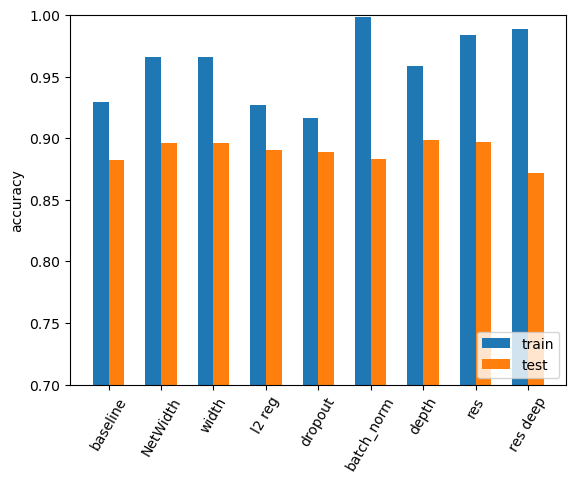

In [165]:
trn_acc = [v["train"] for k, v in all_acc_dict.items()]
val_acc = [v["test"] for k, v in all_acc_dict.items()]

width = 0.3
plt.bar(np.arange(len(trn_acc)), trn_acc, width=width, label="train")
plt.bar(np.arange(len(val_acc)) + width, val_acc, width=width, label="test")
plt.xticks(np.arange(len(val_acc)) + width / 2, list(all_acc_dict.keys()), rotation=60)
plt.ylabel("accuracy")
plt.legend(loc="lower right")
plt.ylim(0.7, 1)
# plt.savefig("accuracy_comparison.png", bbox_inches="tight")
plt.show()